In [1]:
import cv2

In [2]:
#we will only deal with car person and motorbike
loc=r'natural-images'

In [3]:
#1 Extract the labels
#2 Extract the features


In [4]:
i1='car_0674.jpg'    #slicing the list
i1.split('_')
#os.listdir(loc) get files


['car', '0674.jpg']

In [5]:
import os  
label=[]
#os is library used to list down all the files in directory 
# used for dealing with directory
for i in os.listdir(loc):
    if i.split('_')[0]=='car':
        label.append(2)
    elif i.split('_')[0]=='motorbike':
        label.append(0)
    if i.split('_')[0]=='person':
        label.append(0)
#we are separating labels

In [6]:
#label    #we have labels now
#os.path #shows current path
#import numpy as np
#i=cv2.imread('natural-images\car_0674.jpg')




In [7]:
#features we require now
features=[]
for i in os.listdir(loc):
    f=cv2.imread(os.path.join(loc,i))
    resized_f=cv2.resize(f,(70,70))   #resizing all imgaes
    features.append(resized_f)
    
#



In [8]:
#cv2.imread('natural-images/car_0001.jpg') 
#for multiple image we have to do this in loop
#features.shape  # nothing is got
import numpy as np
np.array(features).shape   
#conveting list into numpy array
#but it showing 1 dimension only why
#so we resized the images 


(2742, 70, 70, 3)

In [9]:
#cv2.imread('natural-images/car_0001.jpg').shape 
#single image shape
X=np.array(features)
Y=np.array(label)
X=X.reshape(2742,14700)   #converting features of 4 dimensions into two dimensions

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y)

In [11]:
#we can use any one of them
#Decison treee classifier
#random forest
#svm

from sklearn.tree import DecisionTreeClassifier
dmodel=DecisionTreeClassifier()

In [12]:
#dmodel.fit(xtrain,ytrain)   
#showing error bacause it just neeed two arguments
#we have to reshape the features
# can't touch the 1st dimension of features
#we have to make the three features reshape in 1 d

dmodel.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
 #Training accuracy  
    #accuracy over which you trained data
dmodel.score(xtrain,ytrain)  #overfit model

1.0

In [14]:
#accuracy over that which we have not trained
#testing Accuracy
dmodel.score(xtest,ytest)  
#testing accuracy is low
#overfit model : training accuracy is high testing acccuracy has difference of 20%
#so we rejected Decision tree classifier


0.8833819241982507

In [15]:
dmodel.predict(xtest[50].reshape(1,-1)) #predicitng

array([0])

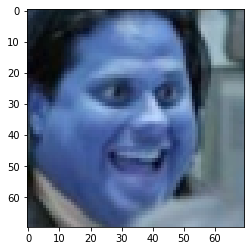

In [16]:
import matplotlib.pyplot as plt
plt.imshow(xtest[50].reshape(70,70,3))
plt.show()

In [17]:
from sklearn.ensemble import RandomForestClassifier
rmodel=RandomForestClassifier()
rmodel.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
#accuracy of random forest over training Data
#Training Accuracy
rmodel.score(xtrain,ytrain)

1.0

In [19]:
#accuracy oof random forest over test data
#testing accuracy
rmodel.score(xtest,ytest)
#decision tree is more memorising the data then random forest
#random forest is actually better trained than decision tree

0.9577259475218659

In [20]:
#so decision tree not best for this data


In [21]:
from sklearn.svm import SVC
smodel=SVC()
smodel.fit(xtrain,ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#testing accuracy
smodel.score(xtrain,ytrain)
#overfit model

In [ ]:
#training accuracy
smodel.score(xtest,ytest)
#very less training accuracy
#svm fair here becuase it fails here because of no proper separation of data

In [ ]:
#there k means is not used beacuse they have labels given already
#1.we form cluster using kmeans.fit(data input)
#2.labels are assigned(Three Labels Here)
#3. kmeans.predict for predicting the data
#4.

In [ ]:
from sklearn.naive_bayes import GaussianNB
gmodel=GaussianNB()

In [ ]:
gmodel.fit(xtrain,ytrain)

In [ ]:
#Trainig accuracy 
gmodel.score(xtrain,ytrain)

In [ ]:
#testing accuracy
gmodel.score(xtest,ytest)
#it is actually being trained rather than being learning